<a href="https://colab.research.google.com/github/jramos4024/Data-Mining-Integration-Project/blob/main/DataMiningProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
#Filetring data and droping columns that we feel dont give too much info
df.drop(['Unnamed: 0','track_id','artists','album_name','track_name','mode'],inplace = True, axis=1)

#Convert explicit column to numeric (False to 0, True to 1)
df['explicit'] = df['explicit'].astype(bool).astype(int)

# get the track genres and turning them into numpy array
genre = df['track_genre'].to_numpy()

# drop the genres from the dataframe and put the cols of data attributes into numpy array
data = (df.drop('track_genre', axis=1)).to_numpy()

print('shape of data', data.shape)
print('length of genres', len(genre))

# get the unique genres
print('unique genres', np.unique(genre))

shape of data (114000, 14)
length of genres 114000
unique genres ['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie' 'indie-pop' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop' 'pop-film' 'power-pop'
 'progressive-house' 'psych-rock' 'punk' 'punk-rock' 'r-n-b' 'reggae'
 'reggaeton' 'rock' 'rock-n-roll

Preparing data for classifcation

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,genre, test_size=0.30,random_state=5)

#Scaling the Data for better accuracy
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Classification with K-nn

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Closer neighbors have more influence
model = KNeighborsClassifier(n_neighbors=30,weights='distance')

# Use the scaled training data to fit the model
model.fit(X_train_scaled, y_train)
# Use the scaled testing data for prediction
y_pred = model.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))

0.23517543859649123


Classification with Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

# Use the scaled training data to fit the model
model.fit(X_train_scaled, y_train)
# Use the scaled testing data for prediction
y_pred = model.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))

0.2127485380116959


Classification using Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
# You can start with default parameters and tune them later if needed
rf_model = RandomForestClassifier(random_state=1)

# Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.3270175438596491


Dataset summary and visualization

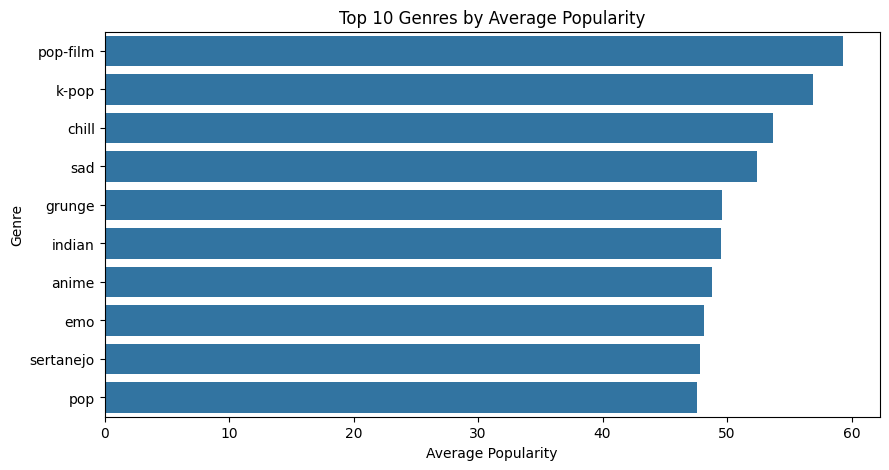

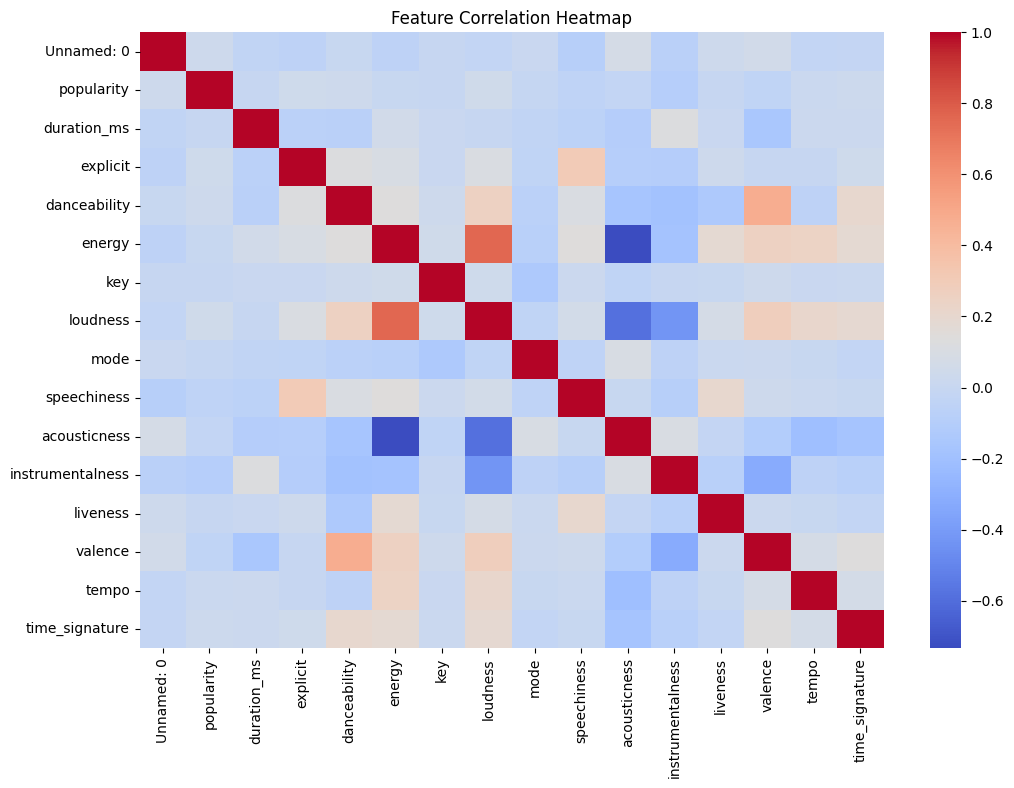

In [11]:
# Visualizing the dataset before modeling
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas again

# Load the data again to access the original dataframe
df = pd.read_csv('dataset.csv')

# a) Top 10 genres by popularity
genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
top_10_popularity_genres = genre_popularity.head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_10_popularity_genres.values, y=top_10_popularity_genres.index)
plt.title('Top 10 Genres by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.show()


# b) Feature correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


Model Metrics: Accuracy, Precision, Recall, F1

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Re-run models to ensure we have separate predictions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# KNN
knn_model = KNeighborsClassifier(n_neighbors=30, weights='distance')
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled, y_train)
y_pred_tree = tree_model.predict(X_test_scaled)

# Random Forest (already trained)
y_pred_rf = rf_model.predict(X_test_scaled)

# Metrics table
metrics = {
    "Model": ["KNN", "Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision (macro)": [
        precision_score(y_test, y_pred_knn, average='macro'),
        precision_score(y_test, y_pred_tree, average='macro'),
        precision_score(y_test, y_pred_rf, average='macro')
    ],
    "Recall (macro)": [
        recall_score(y_test, y_pred_knn, average='macro'),
        recall_score(y_test, y_pred_tree, average='macro'),
        recall_score(y_test, y_pred_rf, average='macro')
    ],
    "F1 (macro)": [
        f1_score(y_test, y_pred_knn, average='macro'),
        f1_score(y_test, y_pred_tree, average='macro'),
        f1_score(y_test, y_pred_rf, average='macro')
    ]
}

import pandas as pd
results_df = pd.DataFrame(metrics)
results_df


,Model,Accuracy,Precision (macro),Recall (macro),F1 (macro)
0,KNN,0.235175,0.230633,0.235351,0.227131
1,Decision Tree,0.211608,0.217671,0.211594,0.213663
2,Random Forest,0.327018,0.317622,0.327469,0.318710


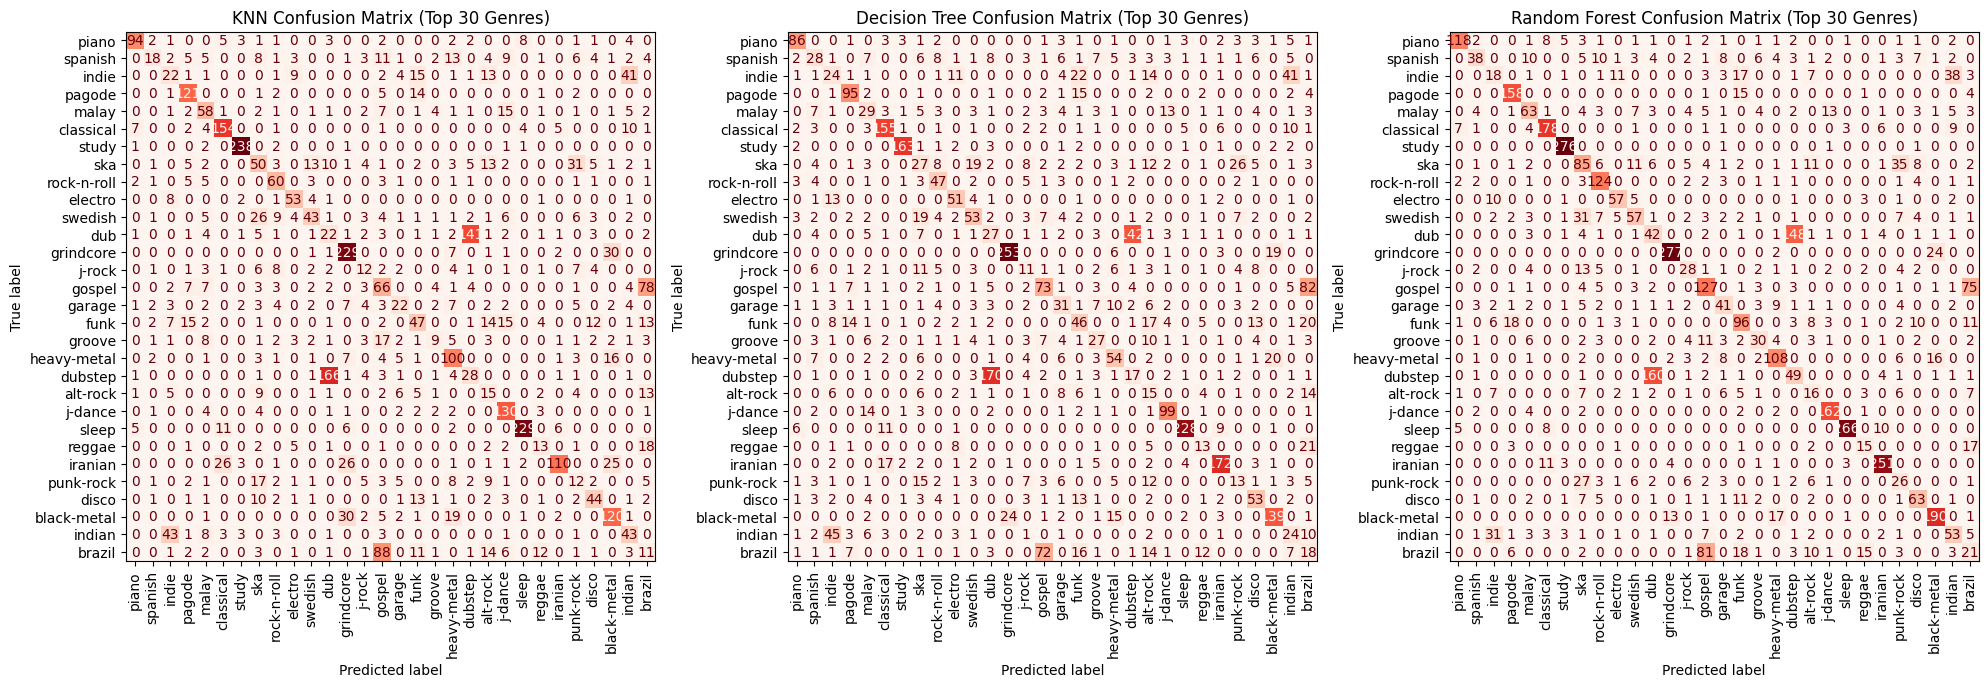

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Get the top 30 genres based on their frequency in the test set
genre_counts = np.unique(y_test, return_counts=True)
sorted_genres = genre_counts[0][np.argsort(-genre_counts[1])]
top_30_genres = sorted_genres[:30]

# Filter y_test and predictions to include only the top 30 genres
top_30_indices = np.where(np.isin(y_test, top_30_genres))[0]
y_test_top_30 = y_test[top_30_indices]

# Assuming you have the predictions stored in variables like y_pred_knn, y_pred_tree, y_pred_rf
# Filter the predictions for the top 30 genres as well
y_pred_knn_top_30 = y_pred_knn[top_30_indices]
y_pred_tree_top_30 = y_pred_tree[top_30_indices]
y_pred_rf_top_30 = y_pred_rf[top_30_indices]


# Create a dictionary of models and their filtered predictions
models_top_30 = {
    "KNN": y_pred_knn_top_30,
    "Decision Tree": y_pred_tree_top_30,
    "Random Forest": y_pred_rf_top_30
}

fig, axes = plt.subplots(1, 3, figsize=(20, 15)) # Adjusted figsize for better visibility

for ax, (name, pred) in zip(axes, models_top_30.items()):
    cm = confusion_matrix(y_test_top_30, pred, labels=top_30_genres) # Specify labels
    disp = ConfusionMatrixDisplay(cm, display_labels=top_30_genres) # Specify display labels
    disp.plot(ax=ax, cmap='Reds', colorbar=False) # Use Reds colormap for red and white
    ax.set_title(f"{name} Confusion Matrix (Top 30 Genres)")
    ax.tick_params(axis='x', rotation=90) # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()